In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

#zip 파일 현재 폴더로 복사, 중간 부분은 파일명에 따라 변경 필요
!cp '/content/drive/MyDrive/archive.zip' ./

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
#압축 해제
!unzip 'archive.zip'

Archive:  archive.zip
replace Covid Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [66]:
data = pd.read_csv("Covid Data.csv")
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [67]:
data.drop(["MEDICAL_UNIT", "INTUBED","USMER", "PATIENT_TYPE"], axis = 1)

,SEX,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,03/06/2020,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,09/06/2020,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,21/06/2020,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,9999-99-99,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,2,9999-99-99,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,9999-99-99,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,9999-99-99,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97


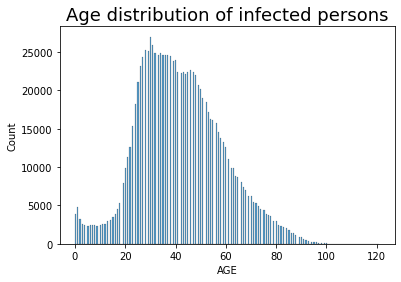

In [68]:
sns.histplot(x=data.AGE)
plt.title("Age distribution of infected persons", color="black", fontsize=18);

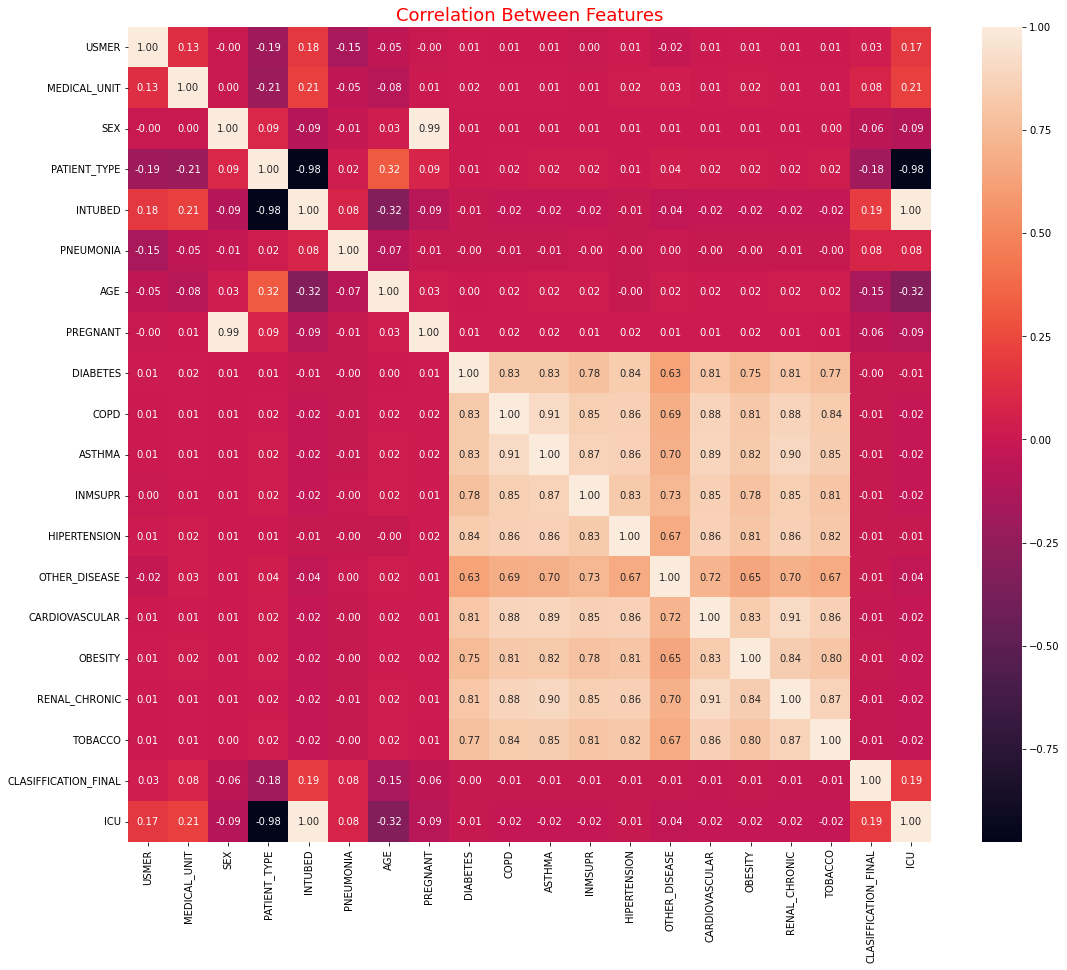

In [69]:
plt.figure(figsize=(18,15))
sns.heatmap(data.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");

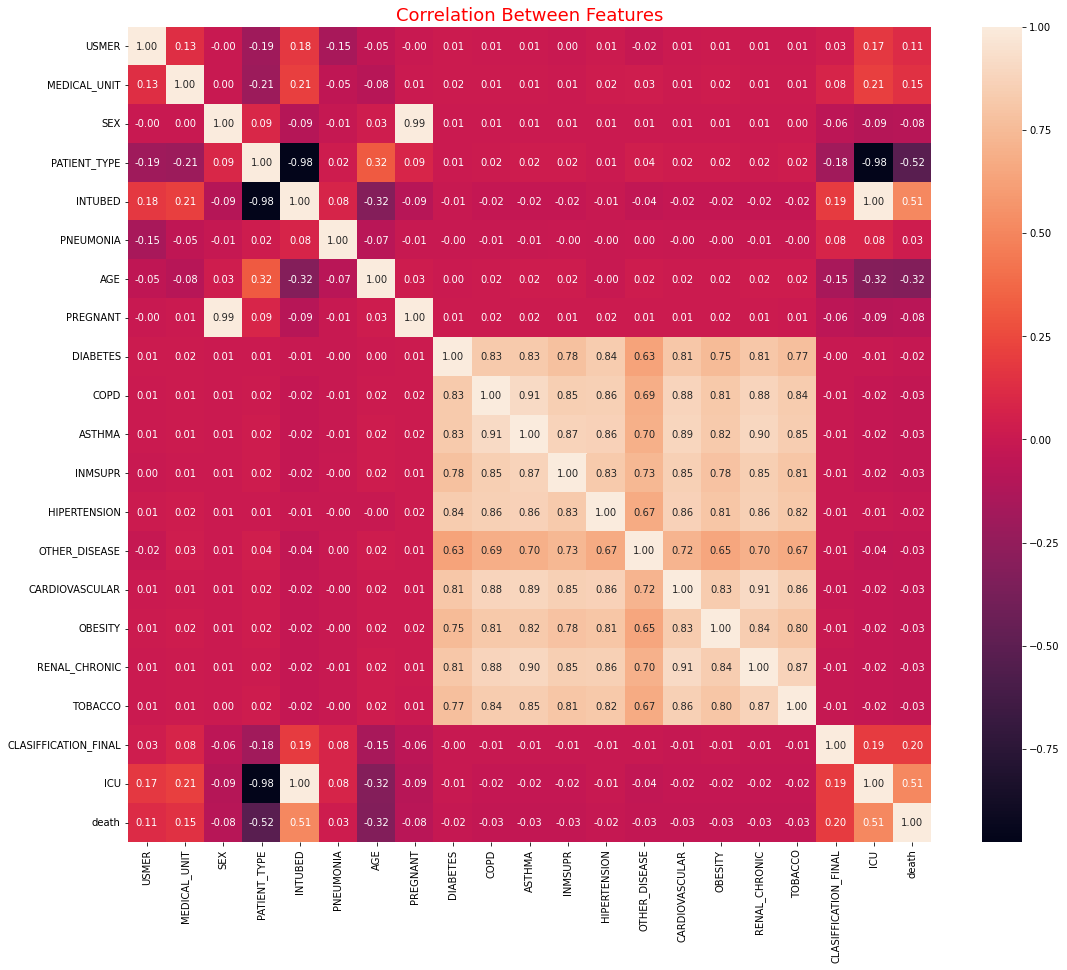

In [115]:
plt.figure(figsize=(18,15))
sns.heatmap(data.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");

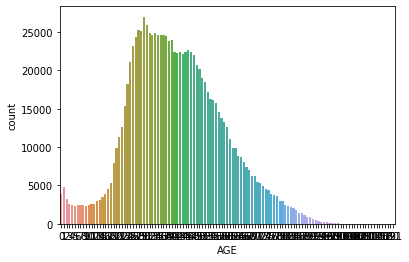

In [70]:
df1 = pd.DataFrame({"AGE" : data["AGE"], 
                    "DIABETES" : data["DIABETES"]})
df1 = df1.astype({'DIABETES':'str'})
sns.countplot(data = df1, x = "AGE")

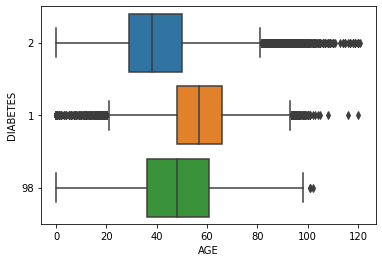

In [71]:
sns.boxplot(data=df1, x="AGE", y="DIABETES")

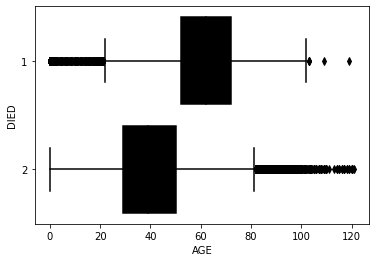

In [72]:
data['death'] = [2 if each == "9999-99-99" else 1 for each in data['DATE_DIED'] ]
df2 = pd.DataFrame({"AGE" : data["AGE"], 
                    "DIED" : data["death"]})
df2 = df2.astype({'DIED':'str'})
sns.boxplot(data = df2, x = "AGE", y = "DIED", color = "black")

In [73]:
x = data.drop(["death", "DATE_DIED"], axis = 1)
y = data["death"]

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=0)

In [74]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",reg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9356078487471091


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=100, eta0=0.1, random_state=1).fit(train_x, train_y)

model.score(test_x, test_y)


0.8200176429916792

In [77]:
print(train_x.tail())
print(train_x.shape)

        USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  INTUBED  PNEUMONIA  AGE  \
963395      1            12    1             1       97          2   62   
117952      1             4    2             1       97          2   23   
435829      2            10    2             1       97          2   34   
305711      1             4    1             1       97          2   24   
985772      1            12    1             2        2          2   36   

        PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  \
963395         2         2     2       2        2             2   
117952        97         2     2       2        2             2   
435829        97         2     2       2        2             2   
305711         2         2     2       2        2             2   
985772         2         2     2       2        2             2   

        OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
963395              2               2        2              2        1  

In [116]:
import numpy as np



def wjddls():
  q1 = int(input("코로나로 인한 치료를 총 몇번 받았나요?"))
  medical_unit = 12
  sex = int(input("성별이 어떻게 되나요? (여자면 1, 남자면 2)"))
  patient_type = int(input("자가 치료중이면 1, 병동 치료중이면 2"))
  intubed = int(input("인공호흡기를 착용중이면 1, 아니면 2"))
  pneumonia = int(input("기낭염증을 가지고 있나요? 없으면1, 있으면 2"))
  age = int(input("나이는 몇살인가요?(입력 예시: 20)"))
  if sex == 1:
    pregnant = int(input("임신 중인가요?(맞으면 1, 틀리면 2)"))
    if pregnant == 2:
      pregnant = 1
  else:
    pregnant = 97
  diabetes = int(input("당뇨를 가지고 있나요?(맞으면 1, 틀리면 2)"))
  copd = int(input("만성 폐쇄성 폐질환을 가지고 있나요?(맞으면 1, 틀리면 2)"))
  asthma = int(input("천식이 있나요요?(맞으면 1, 틀리면 2)"))
  inmus = int(input("면역 결핍이 있나요?(맞으면 1, 틀리면 2)"))
  hiper = int(input("고혈압을 가지고 있나요?(맞으면 1, 틀리면2)"))
  other = int(input("기타 질병을 가지고 있나요?(맞으면 1, 틀리면2)"))
  heart = int(input("심장 질환을 가지고 있나요?(맞으면 1, 틀리면2"))
  pig = int(input("비만인가요?(맞으면 1, 틀리면2)"))
  renal = int(input("천식이 있나요?(맞으면 1, 틀리면2)"))
  tobacco = int(input("흡연자 인가요?(맞으면 1, 틀리면2)"))
  final = 3
  icu = int(input("중환자실 인가요?(맞으면 1, 틀리면2)"))
  information = [q1, medical_unit, sex, patient_type, intubed, pneumonia,age, pregnant, diabetes, copd, asthma,inmus, hiper, other, heart, pig, renal, tobacco, final, icu]

  import numpy as np
  information = np.array(information).reshape(1,-1)

  dice = reg.predict_proba(information)
  dice = float(dice[0][1])
  dice = round(dice, 2) * 100
  print("------------------------------------")
  print(f"완전히 치료될 확률은 {dice}%입니다")

wjddls()

코로나로 인한 치료를 총 몇번 받았나요?2
성별이 어떻게 되나요? (여자면 1, 남자면 2)2
자가 치료중이면 1, 병동 치료중이면 22
인공호흡기를 착용중이면 1, 아니면 21
기낭염증을 가지고 있나요? 없으면1, 있으면 21
나이는 몇살인가요?(입력 예시: 20)80
당뇨를 가지고 있나요?(맞으면 1, 틀리면 2)1
만성 폐쇄성 폐질환을 가지고 있나요?(맞으면 1, 틀리면 2)1
천식이 있나요요?(맞으면 1, 틀리면 2)1
면역 결핍이 있나요?(맞으면 1, 틀리면 2)1
고혈압을 가지고 있나요?(맞으면 1, 틀리면2)1
기타 질병을 가지고 있나요?(맞으면 1, 틀리면2)1
심장 질환을 가지고 있나요?(맞으면 1, 틀리면21
비만인가요?(맞으면 1, 틀리면2)1
천식이 있나요?(맞으면 1, 틀리면2)1
흡연자 인가요?(맞으면 1, 틀리면2)1
중환자실 인가요?(맞으면 1, 틀리면2)1
------------------------------------
완전히 치료될 확률은 39.0%입니다


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [113]:
human = [1, 4, 1, 1, 2, 2, 20, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2]
human = np.array(human).reshape(1, -1)
dice = reg.predict_proba(human)
dice = float(dice[0][1])
dice = round(dice, 2) * 100
print(dice)




78.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ModuleNotFoundError: ignored